# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

Answer: $\boldsymbol{a}^T\boldsymbol{x}$ is a scalar (inner product of $\boldsymbol{a}$ and $\boldsymbol{x}$).

What is the *shape* of the thing we are taking the derivative with respect to?

Answer: $\boldsymbol{x}$ is a vector with length n.

What is the *shape* of the result of the expression?

Answer: Differentiating a scalar with respect to a vector returns a vector, so the derivative is a vector of length n.

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

Answer:
$\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}}$ is the gradient of $\boldsymbol{a}^T\boldsymbol{x}$ with respect to $\boldsymbol{x}$, which by definition is a row vector with length equal to that of $\boldsymbol{x}$.
The elements of this row vector can be found by first considering that $\boldsymbol{a}^T\boldsymbol{x} = \Sigma_i a_i x_i$. Thus, the elements of the gradient are 
$$
(\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}})_i = \frac{\partial}{\partial x_i}(\Sigma_j a_j x_j) = a_i,
$$
which are just the elements of $\boldsymbol{a}$. Since the gradient is a row vector with elements equal to  $\boldsymbol{a}$, then
$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T .
$$

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T).
$$

Answer: $\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})$ is a scalar that we can name $\alpha$. 
$\alpha$ will by the rules of matrix multiplication have the value
$$
    \alpha = \Sigma_{i,j} a_i A_{ij} a_j.
$$
Like we argued in b, the gradient of a scalar is a row vector, which we will name $w^T$.The elements of $w$ can be found by 
$$
    w^T_k = \frac{\partial \alpha}{\partial a_k} = \frac{\partial}{\partial a_k} (\Sigma_{i,j} a_i A_{ij} a_j) = \Sigma_i a_i A_{ik} + \Sigma_j a_j A_{kj}.
$$
Furthermore, the rules of matrix multiplication imply that $(a^T A)_k = \Sigma_i a_i A_{ik}$ and that $(a^T A^T)_k = \Sigma_j a_j A_{kj}$. Thus, we can identify these terms in the expression for $w^T_k$, 
$$
    w^T_k =(a^T A)_k + (a^T A^T)_k \Rightarrow w^T = (a^T A) + (a^T A^T) = a^T(A+A^T),
$$
which completes the proof.

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

Answer: The argument for which the derivative is zero, is the location of an extremal point. Since the squared error is a parabola, it has at most one extremal point. And since the mean squared error by definition is larger than or equal to zero, the extremal point has to be a minimum.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

Answer: If $\boldsymbol{X}$ is invertible, then $\boldsymbol{\theta} = \boldsymbol{X}^{-1}\boldsymbol{y}$.

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

Answer: define $\boldsymbol{w}=\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}$.
$\boldsymbol{w}^T\boldsymbol{w} = ||\boldsymbol{w}||^2=\Sigma_i w^2_i$.
By the chain rule,
$$
\frac{\partial (\boldsymbol{w}^T\boldsymbol{w})}{\partial s} = \frac{\partial (\boldsymbol{w}^T\boldsymbol{w})}{\partial \boldsymbol{w}} \frac{\partial \boldsymbol{w}}{\partial \boldsymbol{s}}.
$$
$$
    \frac{\partial (\boldsymbol{w}^T\boldsymbol{w})}{\partial \boldsymbol{w}} = 2 \boldsymbol{w}^T
$$

$$
    \frac{\partial \boldsymbol{w}}{\partial \boldsymbol{s}} = -\boldsymbol{A}
$$
$$
 \Rightarrow \frac{\partial (\boldsymbol{w}^T\boldsymbol{w})}{\partial s} = 2 \boldsymbol{w}^T*(-\boldsymbol{A}) \Rightarrow \frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A}
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.
$$
\frac{\partial (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^T (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})}{\partial \theta} = -2 (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^T\boldsymbol{X}=0
$$
$$
\Rightarrow \boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}) = 0 \Rightarrow \boldsymbol{X}^T \boldsymbol{y} = \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\theta}
$$
$$
\Rightarrow \boldsymbol{\hat{\theta}_{OLS}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [3]:
import numpy as np

In [2]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [3]:
X = np.zeros((n, 3))
X[:, 0] = np.ones(n) # intercept column
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [16]:
def OLS_parameters(X, y):
    inverse = np.linalg.inv(np.matmul(X.T,X))
    XTy = np.matmul(X.T, y)
    return np.matmul(inverse,XTy)


In [ ]:

beta = OLS_parameters(X, spending)

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [8]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [5]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1)) # p+1 because we include the intercept
    for i in range(p+1):
        X[:,i] = x**i
    return X
    #X[:, 0] = ...
    #X[:, 1] = ...
    #X[:, 2] = ...
    # could this be a loop?

X = polynomial_features(x, 5)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [14]:
beta = OLS_parameters(X, y)

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [12]:
beta_train = OLS_parameters(X_train, y_train) # "train" the model by finding the optimal parameters for theta analytically
def MSE(X,y,beta):
    n=len(y)
    vector = y-np.linalg.matmul(X,beta)
    return 1/n*np.inner(vector,vector)

MSE_train = MSE(X_train,y_train,beta_train)
MSE_test = MSE(X_test,y_test,beta_train)

print(f"MSE_train = {MSE_train}")
print(f"MSE_test = {MSE_test}")

MSE_train = 0.014105689185902185
MSE_test = 0.012261751072572737


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

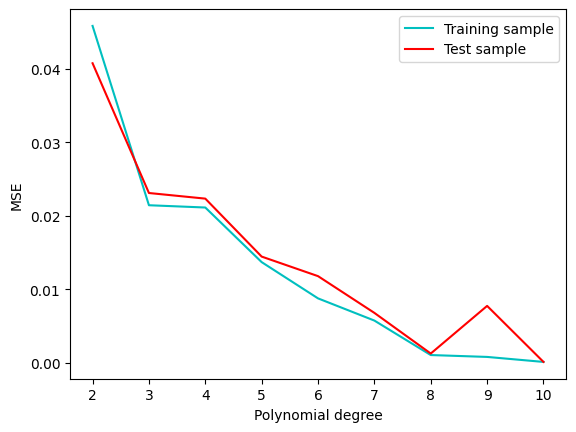

In [35]:
poldegrees = [2,3,4,5,6,7,8,9,10]
MSE_test_list = []
MSE_train_list = []
for p in poldegrees:
    Xp = polynomial_features(x, p)
    Xp_train, Xp_test, y_train, y_test = train_test_split(Xp,y,test_size=0.2)
    betap = OLS_parameters(Xp_train, y_train)

    MSE_test_list.append(MSE(Xp_test,y_test,betap))
    MSE_train_list.append(MSE(Xp_train,y_train,betap))


#### Plot ######
import matplotlib.pyplot as plt

plt.plot(poldegrees,MSE_train_list, 'c-',label="Training sample")
plt.plot(poldegrees,MSE_test_list,'r-', label="Test sample")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

The MSE seems to decrease with higher polynomial degree for both samples, although there is more variation in the test sample. This makes sense, as the fit with the gaussian functions in this example in theory should improve with higher polynomial degree. The fit will not be perfect, because of the random noise that is included. The model seems to improve with higher complexity. The main limitation with this approach is that the $\boldsymbol{X}^T\boldsymbol{X}$ matrix is not always invertible, and the inversion could have large computational cost for large matrices.

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
skl_polyfeatures = PolynomialFeatures(5) # testing for degree 5 
print(skl_polyfeatures.fit_transform(x.reshape(n,1))-X) # check difference between the matrix X we generated earlier and the one generated by scikitlearn

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.55271368e-15
  -1.42108547e-14  5.68434189e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.55271368e-15
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.84217094e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.10542736e-15 -1.42108547e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.77635684e-15
   7.10542736e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.10542736e-15 -1.4210

The difference between the two matrices is practically zero. 

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False) # initialize object with fit_intercept=False
linreg.fit(X,y)
beta = OLS_parameters(X,y)
print(linreg.coef_-beta)

[-6.66133815e-16  1.04916076e-14  1.76247905e-15 -6.27969898e-15
 -1.94289029e-16  6.26235175e-16]


The difference between the parameters calculated by OLS_parameters and the one calculated by scikitlearn is negligable. 